# Descriptive analysis

### Importação de bibliotecas essenciais

In [1]:
# Importação de bibliotecas essenciais
import pandas as pd  # Manipulação de dados em DataFrames
import numpy as np  # Operações matemáticas e manipulação de arrays

# Bibliotecas de visualização de dados
import seaborn as sns  # Visualizações estatísticas
import matplotlib.pyplot as plt  # Visualizações estáticas
import plotly.express as px  # Visualizações interativas e simplificadas

# Configuração para exibir todas as colunas
pd.set_option('display.max_columns', None)

# Configuração de localização para formatar números no padrão brasileiro
import locale
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')  # Configura a localização para o Brasil

format = lambda num: locale.format_string("%d", num, grouping=True)  # Formata números com separador de milhar
from dateutil.relativedelta import relativedelta

In [2]:
df = pd.read_csv('data/df_descriptive_analysis.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Year,Month,Day,Age,Recency,Complain,Children,FamilySize,IsMarried,SeniorityDays,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalMntSpent,TotalPurchases,AvgPurchaseValue,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedAnyCampaign,Response,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,WebVsStorePurchases
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,2012,9,4,57,58,0,0,0,0,663,635,88,546,172,88,88,1617,25,64,3,0,0,0,0,0,0,1,8,10,4,7,2
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,2014,3,8,60,38,0,2,2,0,113,11,1,6,2,1,6,27,6,4,2,0,0,0,0,0,0,0,1,1,2,5,0
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,2013,8,21,49,26,0,0,1,1,312,426,49,127,111,21,42,776,21,36,1,0,0,0,0,0,0,0,8,2,10,4,0
3,6182,1984,Graduation,Together,26646,1,0,2014-02-10,2014,2,10,30,26,0,1,2,1,139,11,4,20,10,3,5,53,8,6,2,0,0,0,0,0,0,0,2,0,4,6,0
4,5324,1981,PhD,Married,58293,1,0,2014-01-19,2014,1,19,33,94,0,1,2,1,161,173,43,118,46,27,15,422,19,22,5,0,0,0,0,0,0,0,5,3,6,5,0


# Análise dimensional

In [3]:
def timeline_comparison(titulo, text_x, var_name, operacao, columns):
    # Certifique-se de que a coluna 'Date' esteja no formato datetime
    df['Date'] = pd.to_datetime(df['Date'])
    # Extraia o ano e o mês da coluna 'Date'
    df['YearMonth'] = df['Date'].dt.to_period('M')

    # Dicionário para mapear operações às funções do Pandas
    operacoes = {'sum': 'sum', 'mean': 'mean', 'median': 'median', 'std': 'std', 'var': 'var', 'max': 'max', 'min': 'min'}

    # Agrupe os dados por mês e aplique a operação especificada
    monthly_sales = df.groupby('YearMonth')[columns].agg(operacoes[operacao]).reset_index()
    # Converta 'YearMonth' para string para melhor visualização no gráfico
    monthly_sales['YearMonth'] = monthly_sales['YearMonth'].astype(str)

    # Reorganize os dados para o Seaborn
    monthly_sales_melted = monthly_sales.melt(id_vars='YearMonth', 
                                              value_vars=columns,
                                              var_name=var_name, 
                                              value_name=text_x)
    # Defina o estilo do Seaborn
    sns.set(style='whitegrid')
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=monthly_sales_melted, x='YearMonth', y=text_x, hue=var_name, marker='o', linewidth=2.5)

    # Adicione título e rótulos
    plt.title(titulo, fontsize=18, fontweight='bold')
    plt.xlabel('Mês', fontsize=14)
    plt.ylabel(text_x, fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title=var_name, title_fontsize='13', fontsize='12')
    
    # Adicione uma grade de fundo
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()
    df.drop(columns='YearMonth', inplace=True)


def plot_pie_chart(title, product_columns):
    # Sum of each product category
    total_spend = df[product_columns].sum()
    # Create a DataFrame for Plotly
    data = {
        'Category': product_columns,
        'Total': total_spend
    }
    # Plotly Donut Chart with labels outside
    fig = px.pie(data, 
                names='Category', 
                values='Total', 
                title=f'{title} - Total: {format(total_spend.sum())}',
                color_discrete_sequence=px.colors.sequential.Reds)
    # Adjust to make it a donut chart and set labels outside
    fig.update_traces(hole=0.4, textinfo='percent', textposition='outside', textfont_size=14)
    # Update title
    fig.update_layout(title_font_size=16)

    fig.show()


def plot_distribution(column):
    plt.figure(figsize=(12, 6))
    
    if pd.api.types.is_numeric_dtype(df[column]):
        # Numeric data: Plot a histogram
        n, bins, patches = plt.hist(df[column], bins=20, color='blue', alpha=0.7, edgecolor='black')
        for i in range(len(patches)):
            patches[i].set_facecolor(sns.color_palette("rocket_r", as_cmap=True)(n[i] / max(n)))
            if n[i] > 0:
                plt.text(patches[i].get_x() + patches[i].get_width() / 2, n[i], int(n[i]), 
                         ha='center', va='bottom', fontsize=10, fontweight='bold')
        plt.title(f'Distribution of {column}', fontsize=16)
        plt.xlabel(column, fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
    
    else:
        # Categorical data: Plot a bar chart
        value_counts = df[column].value_counts()
        bars = plt.bar(value_counts.index, value_counts.values, color='blue', alpha=0.7, edgecolor='black')
        for i, bar in enumerate(bars):
            bar.set_facecolor(sns.color_palette("rocket_r", as_cmap=True)(value_counts.values[i] / max(value_counts.values)))
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), int(bar.get_height()), 
                     ha='center', va='bottom', fontsize=10, fontweight='bold')
        plt.title(f'Distribution of {column}', fontsize=16)
        plt.xlabel(column, fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
    
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()


def strisce(titolo, textY, col, list_cols):
    # Definir faixas de idade automaticamente
    num_bins = 5  # Número de faixas de idade desejadas
    df['ColGroup'], bins = pd.qcut(df[col], q=num_bins, labels=False, retbins=True)

    labels = [f'{int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins)-1)]
    df['ColGroup'] = pd.qcut(df[col], q=num_bins, labels=labels)

    # Agrupar os dados por faixa de idade e calcular a média de crianças em cada faixa
    age_grouped = df.groupby('ColGroup')[list_cols].mean().reset_index()

    # Definir o estilo do gráfico
    sns.set(style="whitegrid")

    # Criar o gráfico de barras múltiplas
    plt.figure(figsize=(10, 6))
    age_grouped_melted = age_grouped.melt(id_vars='ColGroup', value_vars=list_cols, var_name='Colunas', value_name='Media')
    sns.barplot(data=age_grouped_melted, x='ColGroup', y='Media', hue='Colunas', palette="mako")

    # Adicionar título e rótulos aos eixos
    plt.title(f'{titolo}', fontsize=16)
    plt.xlabel(f'{col} (Faixas)', fontsize=14)
    plt.ylabel(f'{textY}', fontsize=14)

    # Mostrar o gráfico
    plt.show()

    df.drop(columns=['ColGroup'], inplace=True)

def dispersion(col1, col2, hue=None):
    # Definir o estilo do gráfico
    sns.set(style="whitegrid")

    # Criar o gráfico de dispersão
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=col1, y=col2, hue=hue, palette='viridis', s=100)

    # Adicionar título e rótulos aos eixos
    plt.title(f'Relação entre {col1} & {col2}', fontsize=16)
    plt.xlabel(col1, fontsize=14)
    plt.ylabel(col2, fontsize=14)

    # Adicionar uma grade
    plt.grid(True)

    # Mostrar o gráfico
    plt.show()

# Função para criar o pairplot
def criar_pairplot(coluna_principal, lista):
    # Adicionar colunas necessárias para o gráfico
    df['Customer_for'] = (pd.to_datetime('today') - pd.to_datetime(df['Dt_Customer'])).dt.days

    # Definir o tema e a paleta de cores
    sns.set_theme(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
    pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]

    # Selecionar as colunas para plotar
    To_Plot = lista + [coluna_principal, "Customer_for"]
    
    # Criar o pairplot
    plt.figure()
    sns.pairplot(df[To_Plot], hue=coluna_principal, palette="mako")
    
    # Mostrar o gráfico
    plt.show()

    df.drop(columns=['Customer_for'], inplace=True)

In [4]:
df['Date'] = pd.to_datetime(df['Dt_Customer'])

---

## Análise temporal

In [5]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

inicio = df['Dt_Customer'].min() - relativedelta(years=2)
fim = df['Dt_Customer'].max()

inicio_str = f"{inicio.day}/{inicio.month}/{inicio.year}"
fim_str = f"{fim.day}/{fim.month}/{fim.year}"

duration = (fim - inicio).days

quantidade_clientes = df.shape[0]
faturamento_total = df['TotalMntSpent'].sum()

print(f"Período de análise: {inicio_str} até {fim_str}. {duration} dias")
print(f"Quantidade de clientes: {quantidade_clientes:,}")
print(f"Faturamento total de ${faturamento_total:,.2f} de 2010 até 2014. (4 anos)")

Período de análise: 30/7/2010 até 29/6/2014. 1430 dias
Quantidade de clientes: 2,206
Faturamento total de $1,335,799.00 de 2010 até 2014. (4 anos)


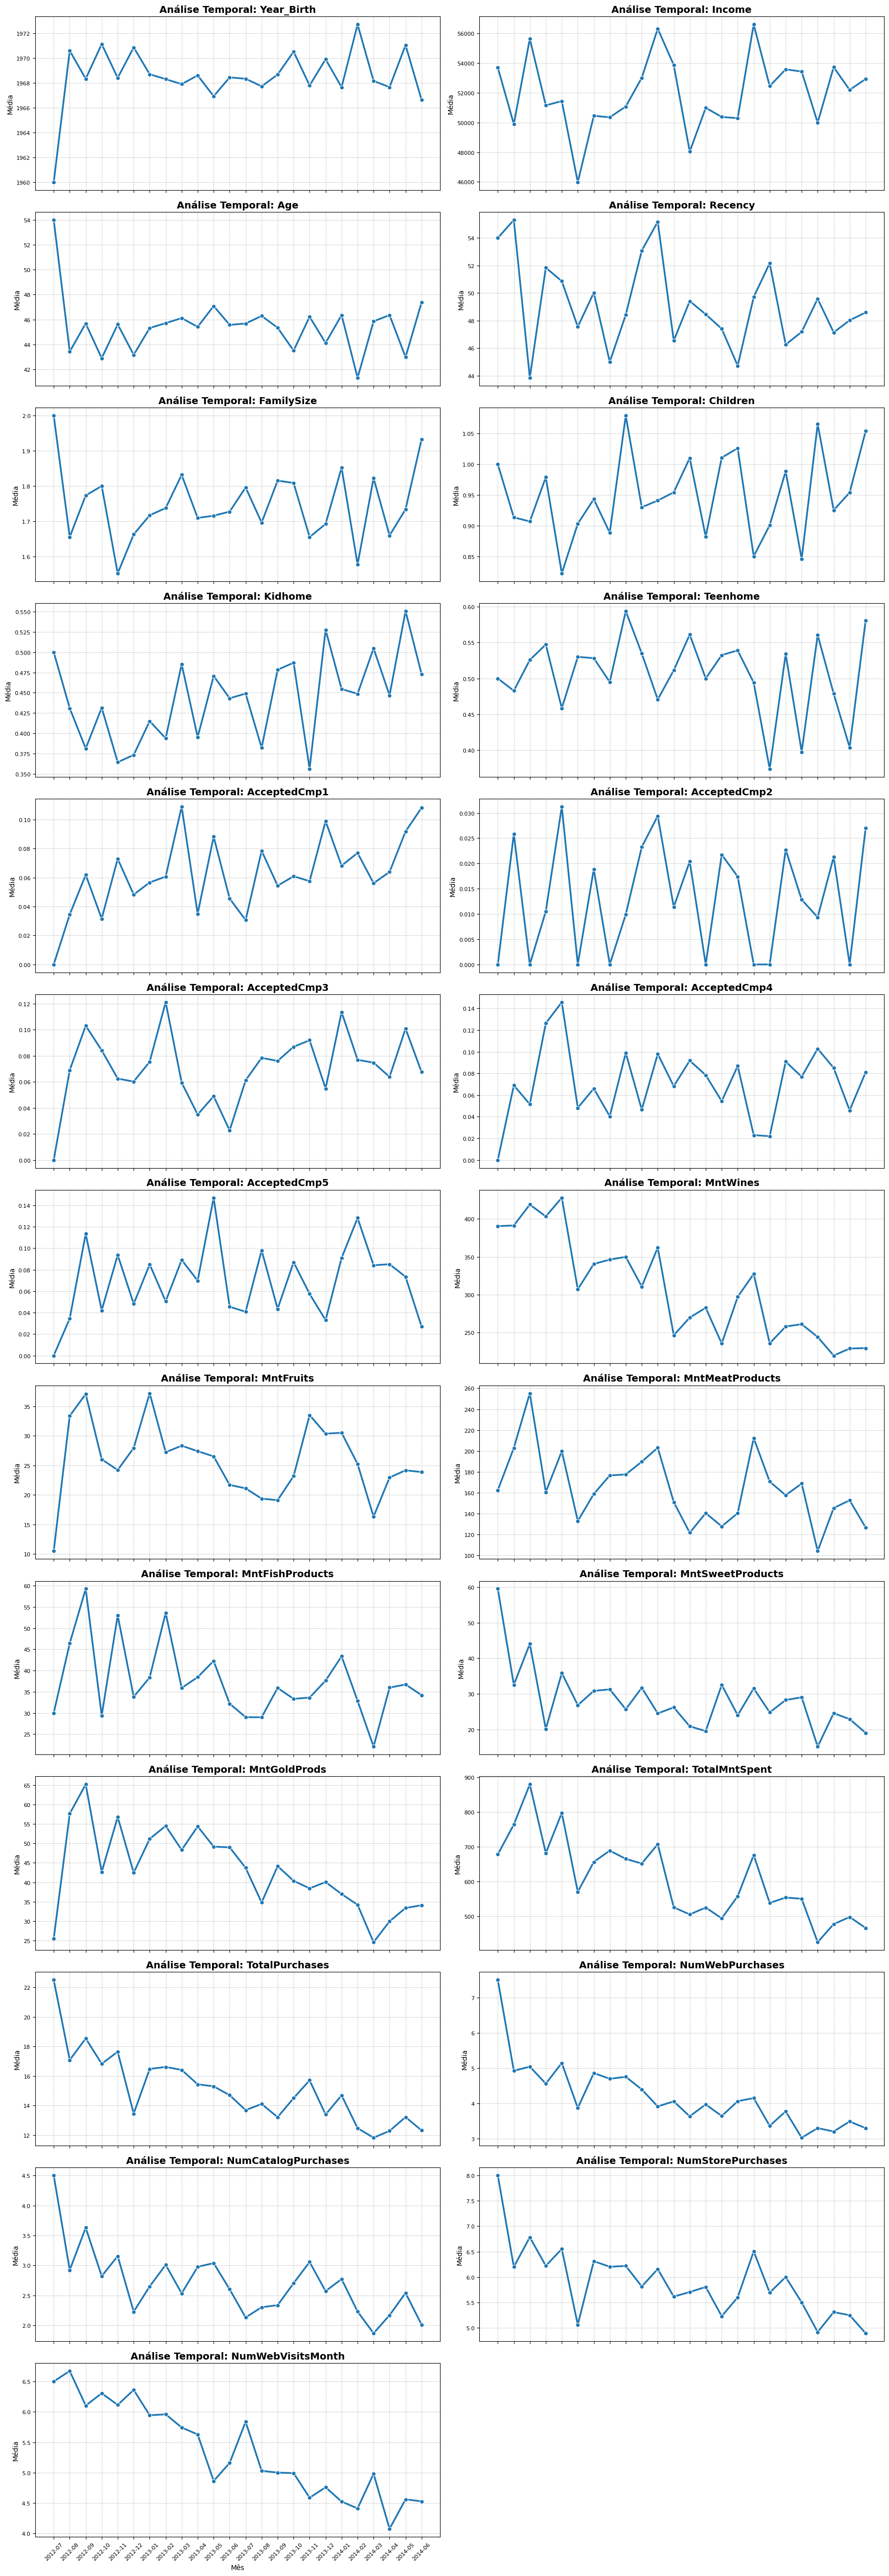

In [6]:
def timeline_comparison_all(titulo, text_x, var_name, operacao, columns):
    # Certifique-se de que a coluna 'Date' esteja no formato datetime
    df['Date'] = pd.to_datetime(df['Date'])
    # Extraia o ano e o mês da coluna 'Date'
    df['YearMonth'] = df['Date'].dt.to_period('M')

    # Dicionário para mapear operações às funções do Pandas
    operacoes = {'sum': 'sum', 'mean': 'mean', 'median': 'median', 'std': 'std', 'var': 'var', 'max': 'max', 'min': 'min'}

    # Criar o layout dos subplots
    num_vars = len(columns)
    num_cols = 2  # Número de colunas
    num_rows = (num_vars + 1) // num_cols  # Calcular o número de linhas necessário

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 4), sharex=True, sharey=False)
    axes = axes.flatten()  # Garantir que os eixos estejam em uma lista

    for idx, column in enumerate(columns):
        # Agrupe os dados por mês e aplique a operação especificada
        monthly_data = df.groupby('YearMonth')[column].agg(operacoes[operacao]).reset_index()
        # Converta 'YearMonth' para string para melhor visualização no gráfico
        monthly_data['YearMonth'] = monthly_data['YearMonth'].astype(str)

        # Criar o gráfico no subplot correspondente
        sns.lineplot(ax=axes[idx], data=monthly_data, x='YearMonth', y=column, marker='o', linewidth=2.5)

        # Adicione título e rótulos ao subplot
        axes[idx].set_title(f'{titulo}: {column}', fontsize=14, fontweight='bold')
        axes[idx].set_xlabel('Mês', fontsize=10)
        axes[idx].set_ylabel(text_x, fontsize=10)
        axes[idx].tick_params(axis='x', rotation=45, labelsize=8)
        axes[idx].tick_params(axis='y', labelsize=8)
        axes[idx].grid(True, which='both', linestyle='--', linewidth=0.5)

    # Remover subplots não usados
    for ax in axes[len(columns):]:
        ax.remove()

    # Ajustar layout
    plt.tight_layout()
    plt.show()

# Lista de colunas a serem analisadas
lista_col = ['Year_Birth', 'Income', 'Age', 'Recency', 'FamilySize', 'Children', 'Kidhome', 'Teenhome',
             'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
             'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'TotalMntSpent',
             'TotalPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# Chamar a função para gerar os gráficos em um único layout
timeline_comparison_all('Análise Temporal', 'Média', 'Variável', 'mean', lista_col)

## Análise Demográfica

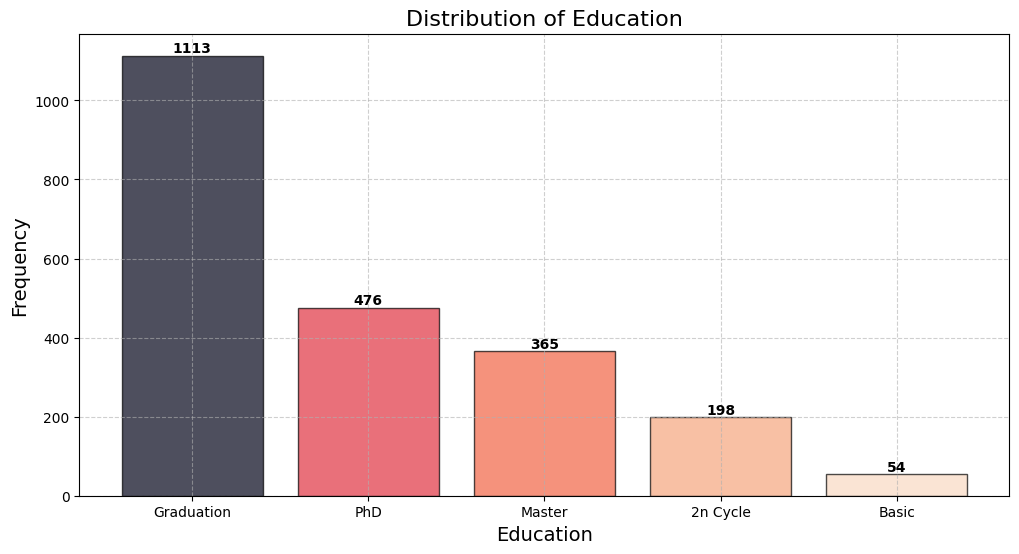

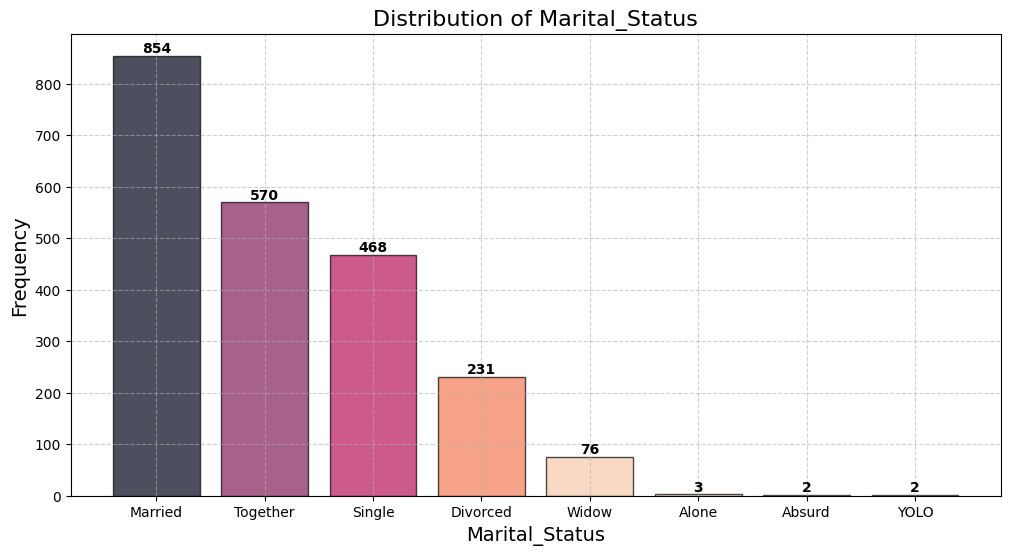

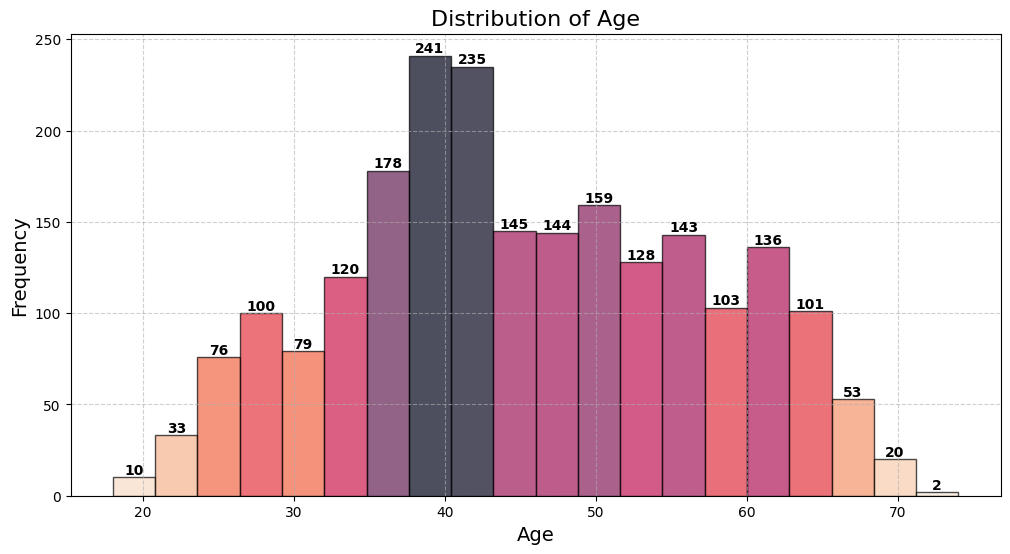

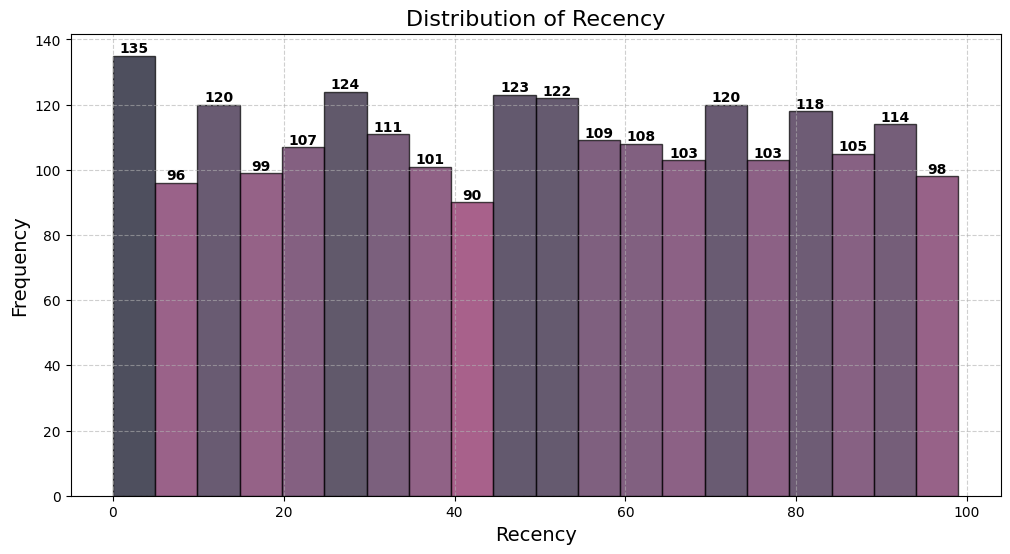

In [7]:
plot_distribution('Education')
plot_distribution('Marital_Status')

plot_distribution('Age')
plot_distribution('Recency')

### Média da quantidade de membros na família por faixa etária

C:\Users\schit\AppData\Local\Temp\ipykernel_19268\1736039036.py:102: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_grouped = df.groupby('ColGroup')[list_cols].mean().reset_index()


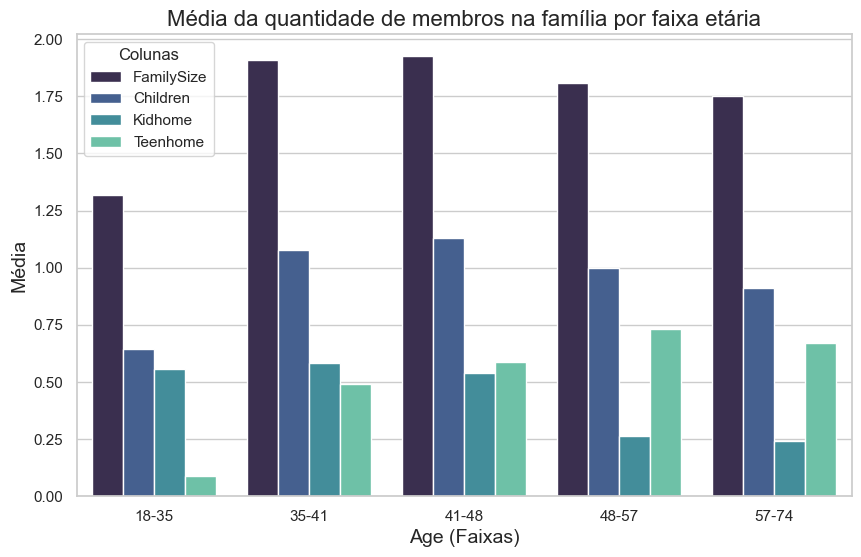

In [8]:
strisce('Média da quantidade de membros na família por faixa etária', 'Média', 
        'Age', ['FamilySize', 'Children', 'Kidhome', 'Teenhome'])

### Média da renda por faixa etária

C:\Users\schit\AppData\Local\Temp\ipykernel_19268\1736039036.py:102: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_grouped = df.groupby('ColGroup')[list_cols].mean().reset_index()


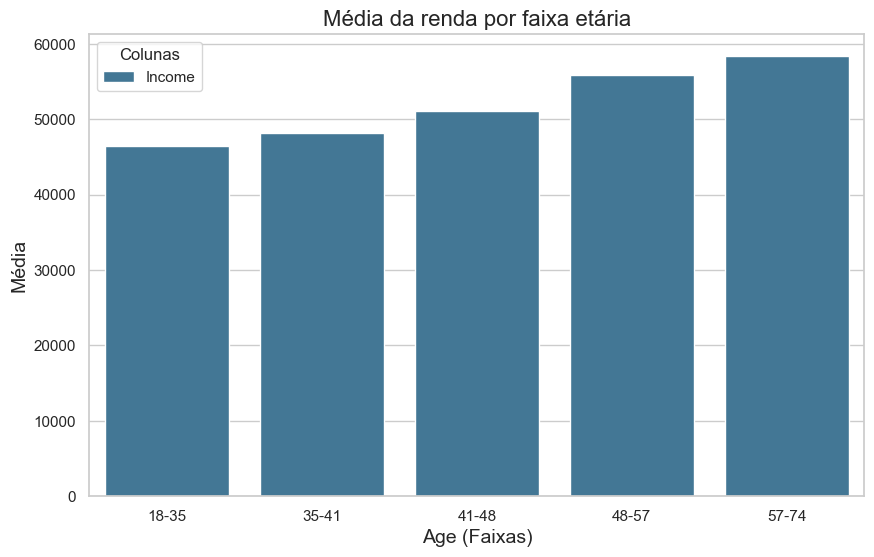

In [9]:
strisce('Média da renda por faixa etária', 'Média', 
        'Age', ['Income'])

### Análise familiar

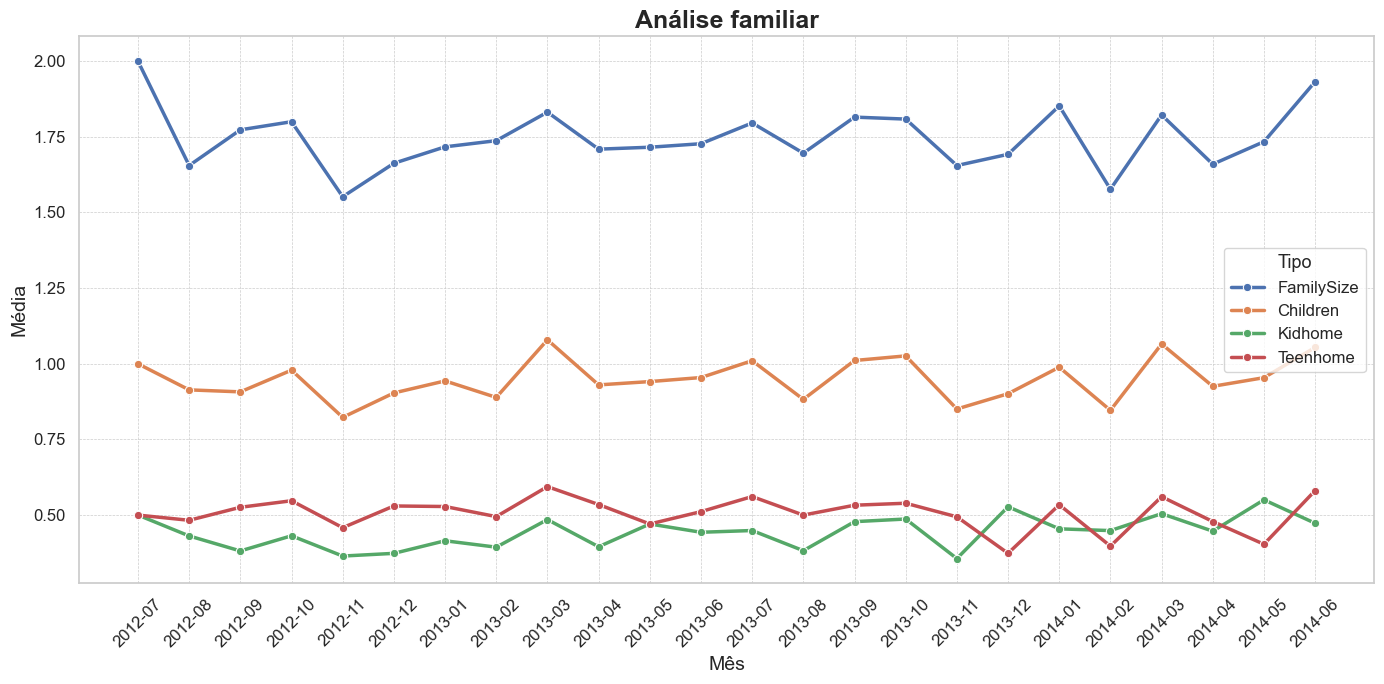

In [10]:
timeline_comparison('Análise familiar', 'Média', 'Tipo',
                    'mean', ['FamilySize', 'Children', 'Kidhome', 'Teenhome'])

### Análise da renda

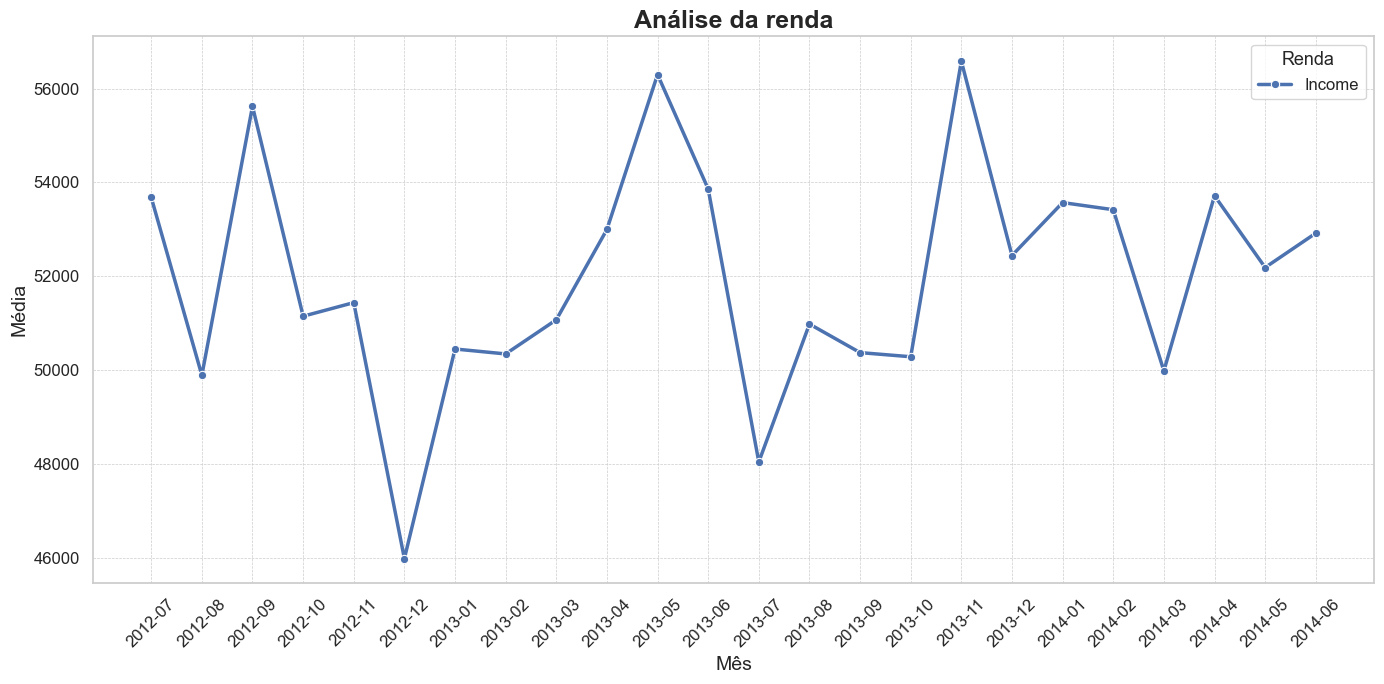

In [11]:
timeline_comparison('Análise da renda', 'Média', 'Renda',
                    'mean', ['Income'])

### Média do número de dias desde a última compra do cliente

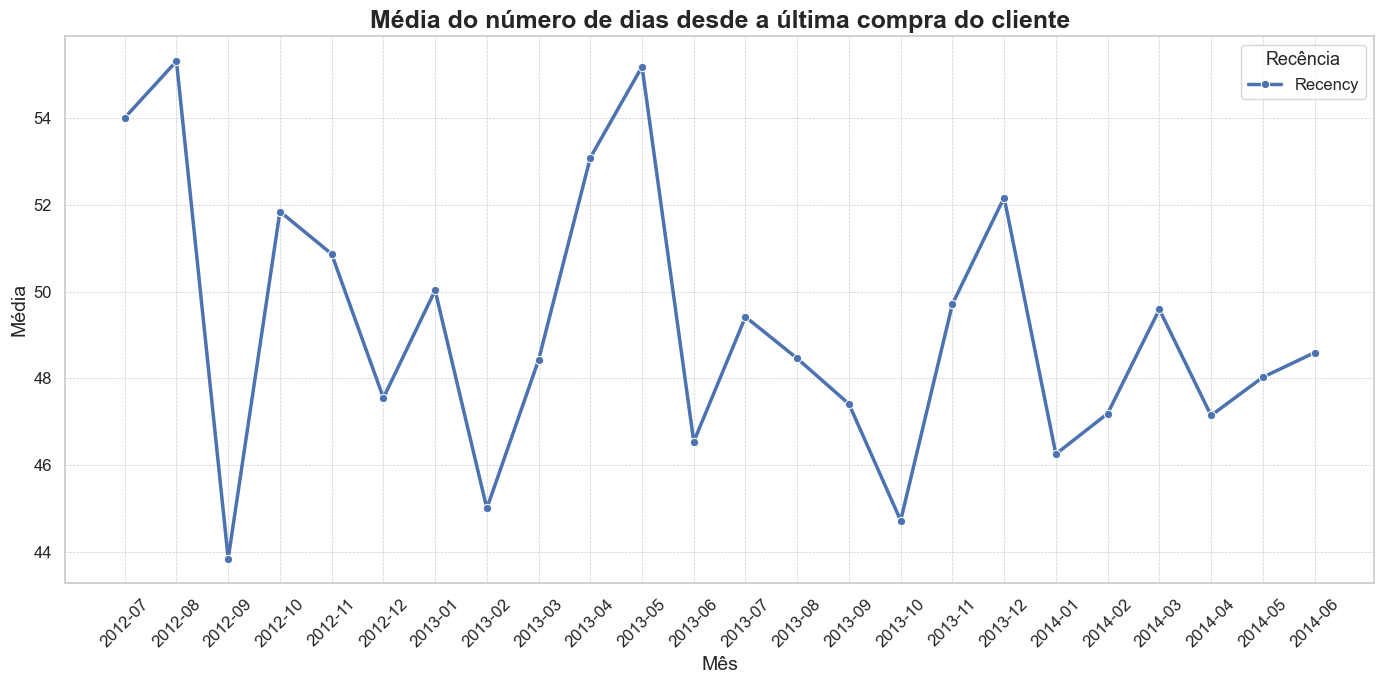

In [12]:
timeline_comparison('Média do número de dias desde a última compra do cliente', 'Média', 'Recência',
                    'mean', ['Recency'])

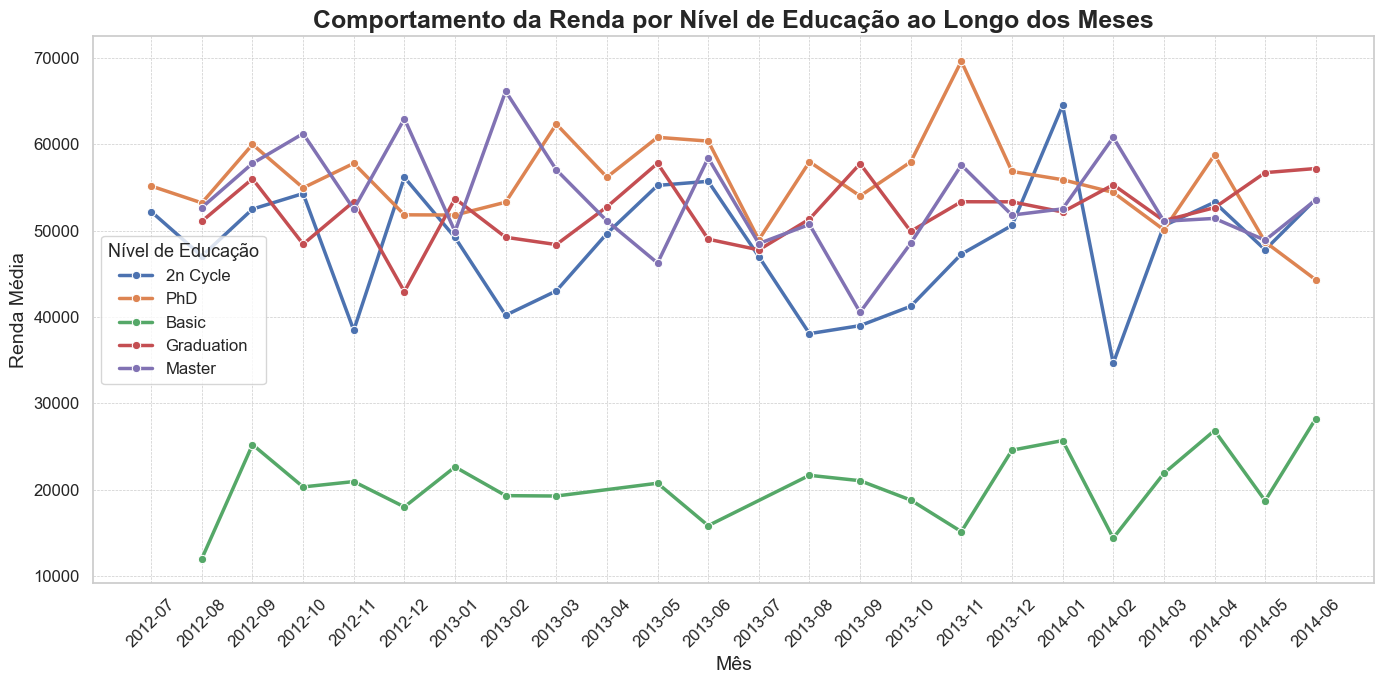

In [13]:
# Agrupe os dados por mês e nível de educação e calcule a média de renda
df['YearMonth'] = df['Date'].dt.to_period('M')
monthly_income_education = df.groupby(['YearMonth', 'Education'])['Income'].mean().reset_index()

# Converta 'YearMonth' para string para melhor visualização no gráfico
monthly_income_education['YearMonth'] = monthly_income_education['YearMonth'].astype(str)

# Defina o estilo do Seaborn
sns.set(style='whitegrid')

# Crie o gráfico de linha
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_income_education, x='YearMonth', y='Income', hue='Education', marker='o', linewidth=2.5)

# Adicione título e rótulos
plt.title('Comportamento da Renda por Nível de Educação ao Longo dos Meses', fontsize=18, fontweight='bold')
plt.xlabel('Mês', fontsize=14)
plt.ylabel('Renda Média', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Nível de Educação', title_fontsize='13', fontsize='12')

# Adicione uma grade de fundo
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Mostre o gráfico
plt.tight_layout()
plt.show()

# Remova a coluna 'YearMonth' do DataFrame original
df.drop(columns='YearMonth', inplace=True)

## Produtos e Compras

### Análise da venda de produto

In [31]:
plot_pie_chart('Análise da venda de tipo de produto', 
               ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'])

### Média da renda por faixa etária

C:\Users\schit\AppData\Local\Temp\ipykernel_19268\1736039036.py:102: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



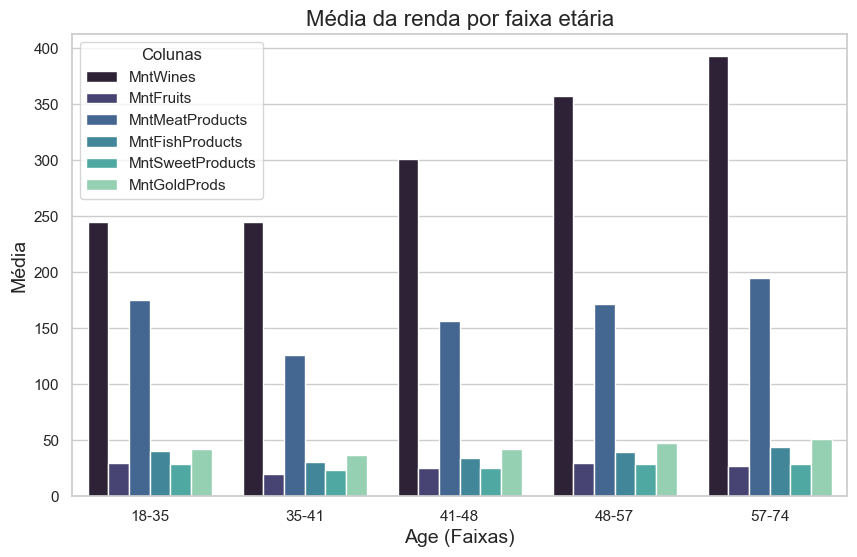

In [15]:
strisce('Média da renda por faixa etária', 'Média', 
        'Age', ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'])

### Análise das vendas por tipo de produto

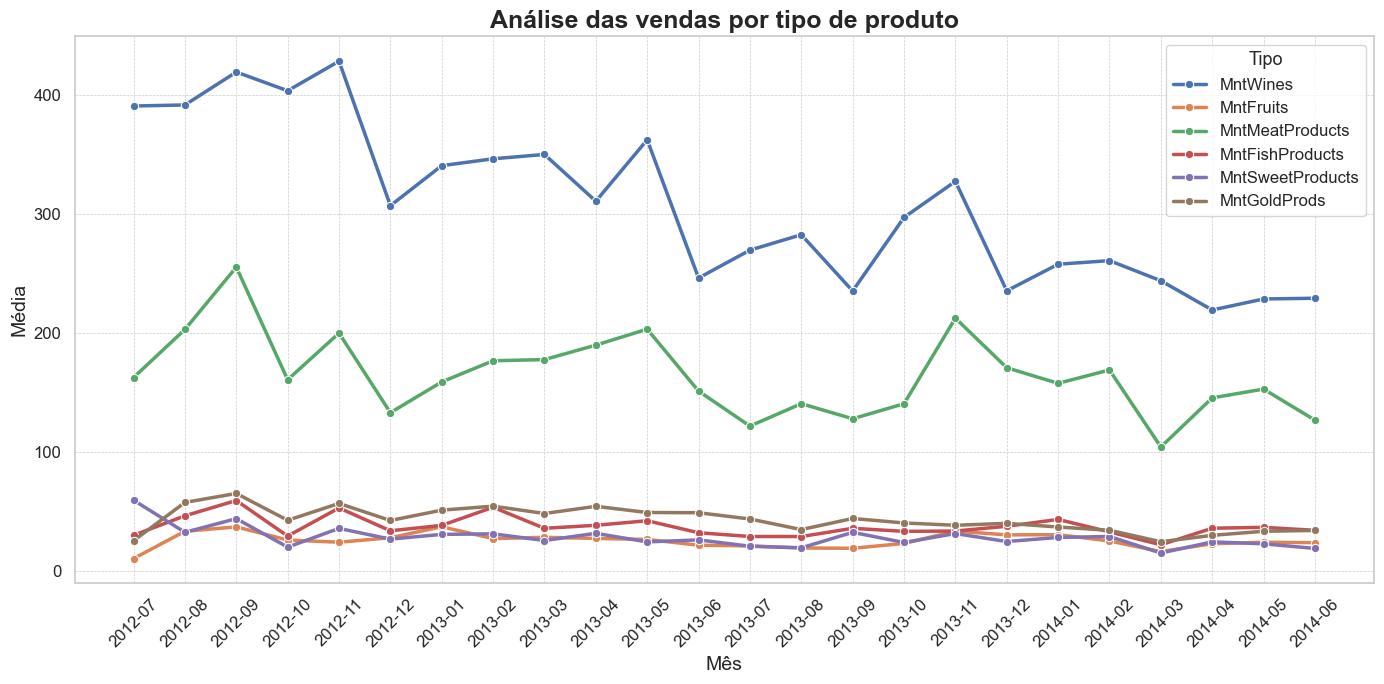

In [16]:
timeline_comparison('Análise das vendas por tipo de produto', 'Média', 'Tipo',
                    'mean', ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'])

### Análise do total de vendas

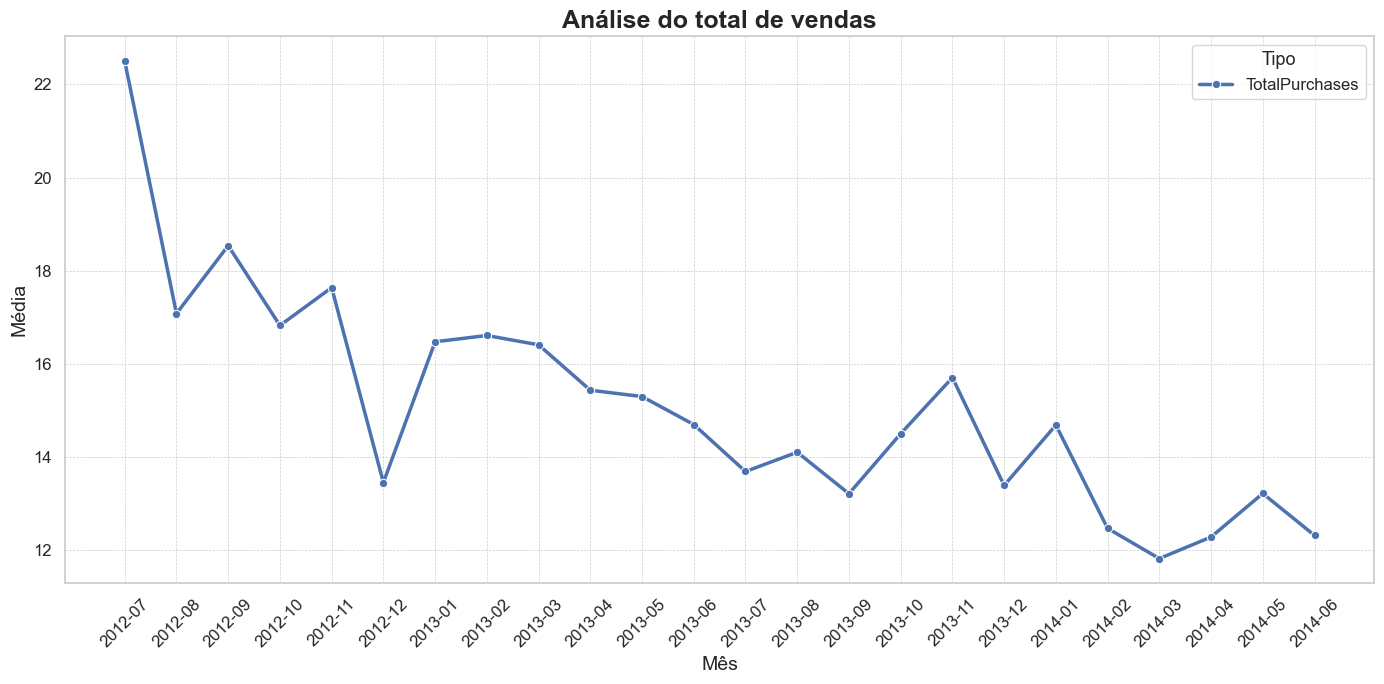

In [17]:
timeline_comparison('Análise do total de vendas', 'Média', 'Tipo', 'mean', ['TotalPurchases'])

### Análise do valor médio das compras feitas nos últimos 2 anos

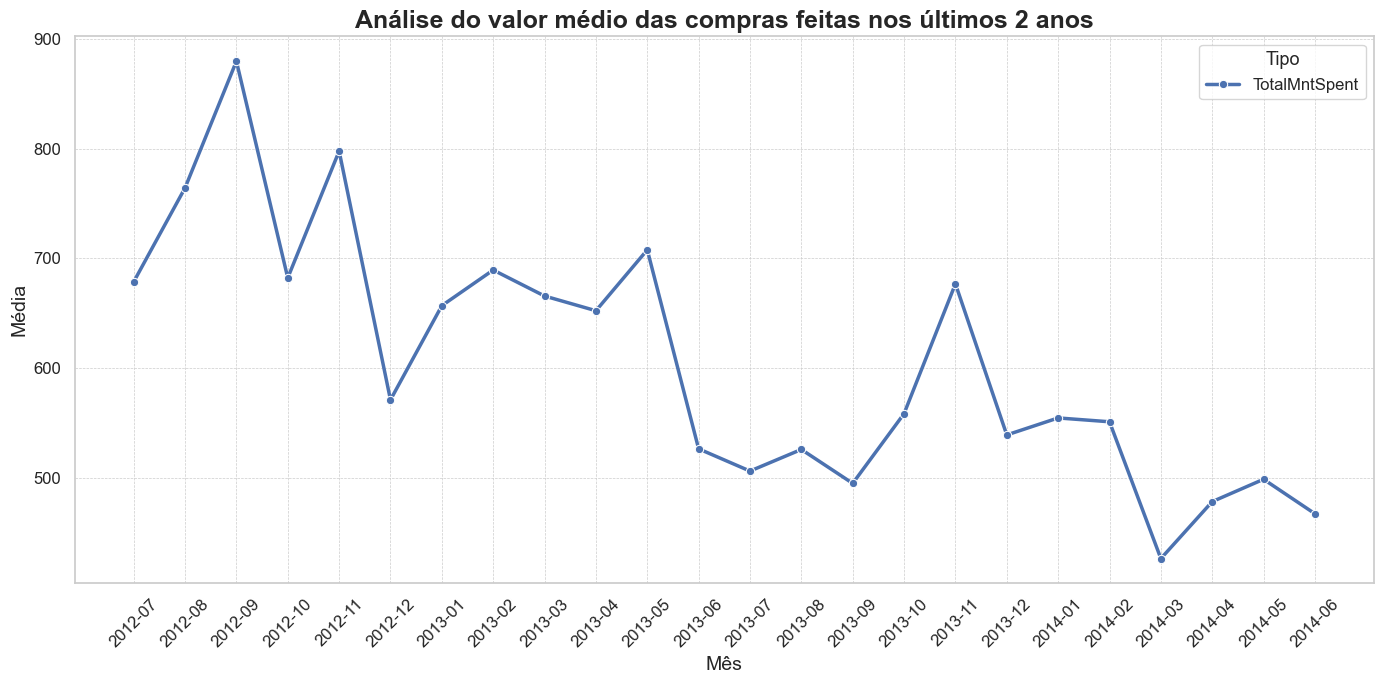

In [18]:
timeline_comparison('Análise do valor médio das compras feitas nos últimos 2 anos', 'Média', 'Tipo', 'mean', ['TotalMntSpent'])

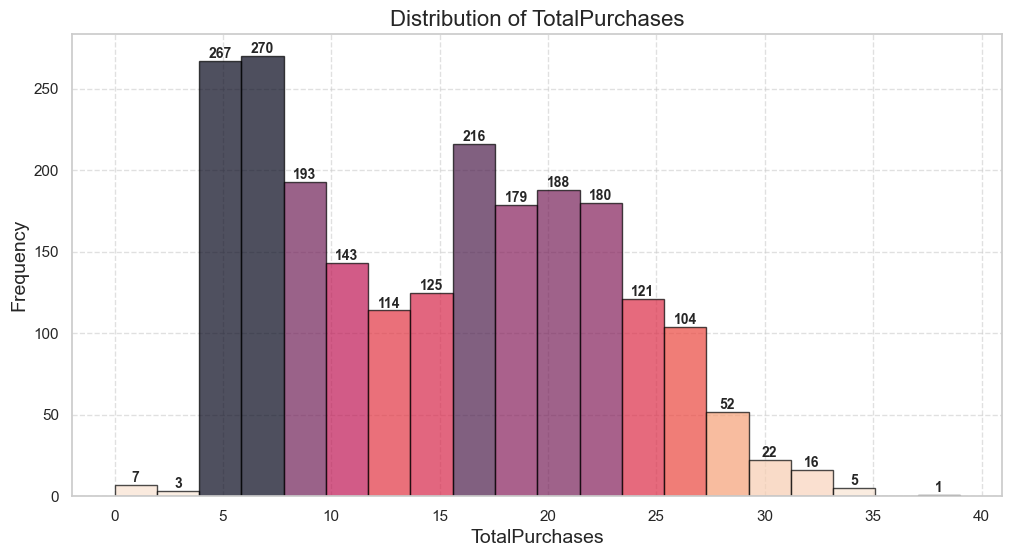

In [19]:
plot_distribution('TotalPurchases')

### Vendas por Faixa de Idade

C:\Users\schit\AppData\Local\Temp\ipykernel_19268\1736039036.py:102: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



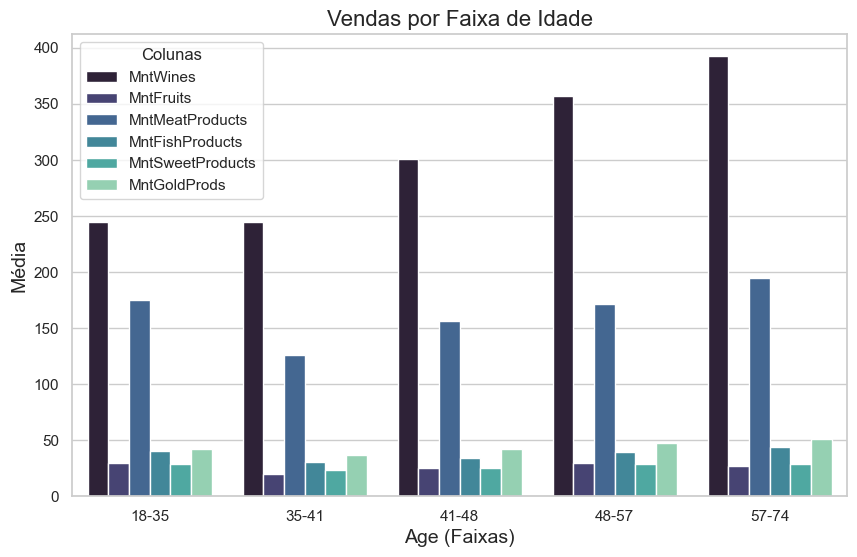

In [20]:
strisce('Vendas por Faixa de Idade', 'Média', 
        'Age', ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'])

### Vendas por Faixa de Renda

C:\Users\schit\AppData\Local\Temp\ipykernel_19268\1736039036.py:102: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



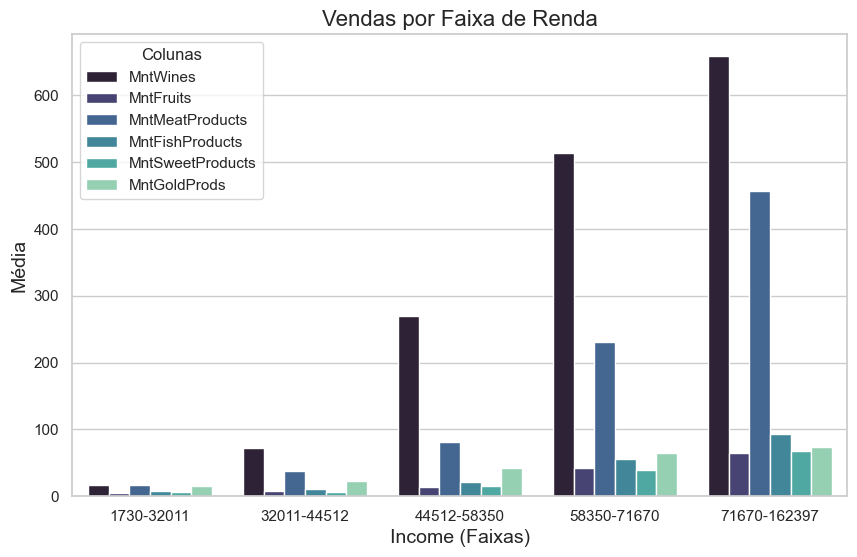

In [21]:
strisce('Vendas por Faixa de Renda', 'Média', 
        'Income', ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'])

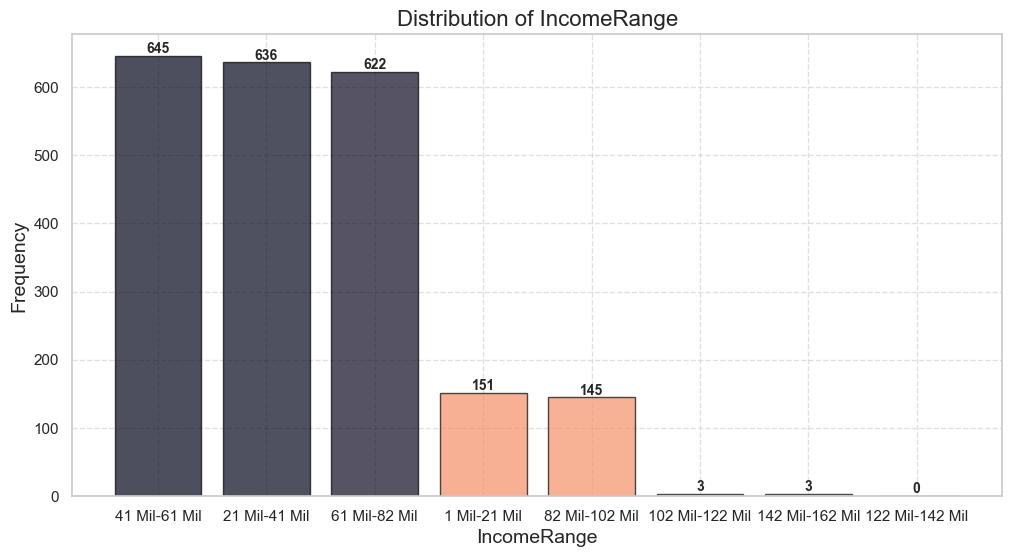

In [22]:
# Definire il numero di fasce di reddito desiderate
num_bins = 8

# Calcolare i limiti delle fasce di reddito
min_income = df['Income'].min()
max_income = df['Income'].max()
bins = np.linspace(min_income, max_income, num_bins + 1)

# Creare le etichette per le fasce di reddito con formattazione migliorata
labels = [f'{int(bins[i]/1000)} Mil-{int(bins[i+1]/1000)} Mil' for i in range(num_bins)]

# Creare una nuova colonna per le fasce di reddito
df['IncomeRange'] = pd.cut(df['Income'], bins=bins, labels=labels, right=False)

# Contare il numero di clienti per ogni fascia di reddito
income_counts = df['IncomeRange'].value_counts().sort_index().reset_index()
income_counts.columns = ['IncomeRange', 'Count']

# Utilizzare la funzione per tracciare la distribuzione delle fasce di reddito
plot_distribution('IncomeRange')

## Campanhas e Promoções

### Distribuição da aceitação por campanha

In [29]:
plot_pie_chart('Distribuição da aceitação por campanha', 
               ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'])

### Aceitação de Campanhas por Faixa de Idade

C:\Users\schit\AppData\Local\Temp\ipykernel_19268\1736039036.py:102: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



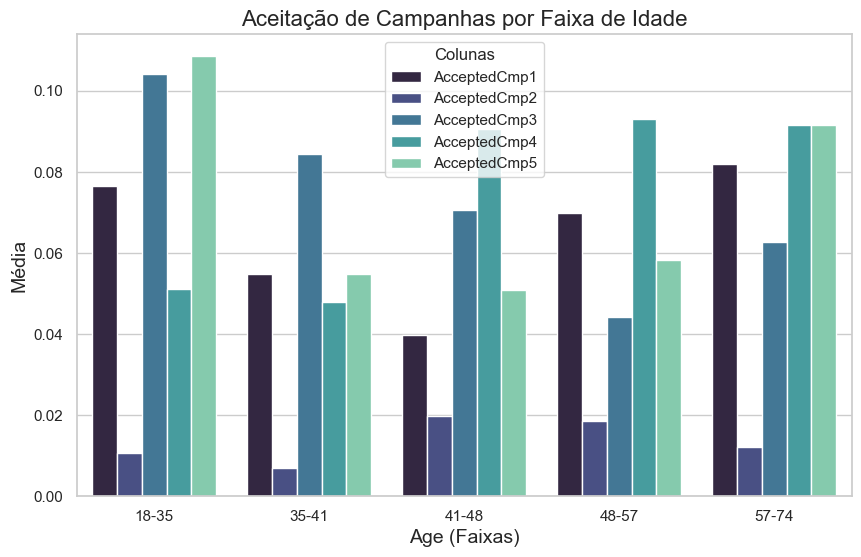

In [24]:
strisce('Aceitação de Campanhas por Faixa de Idade', 'Média', 
        'Age', ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'])

### Aceitação de Campanhas por Faixa de Renda

C:\Users\schit\AppData\Local\Temp\ipykernel_19268\1736039036.py:102: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



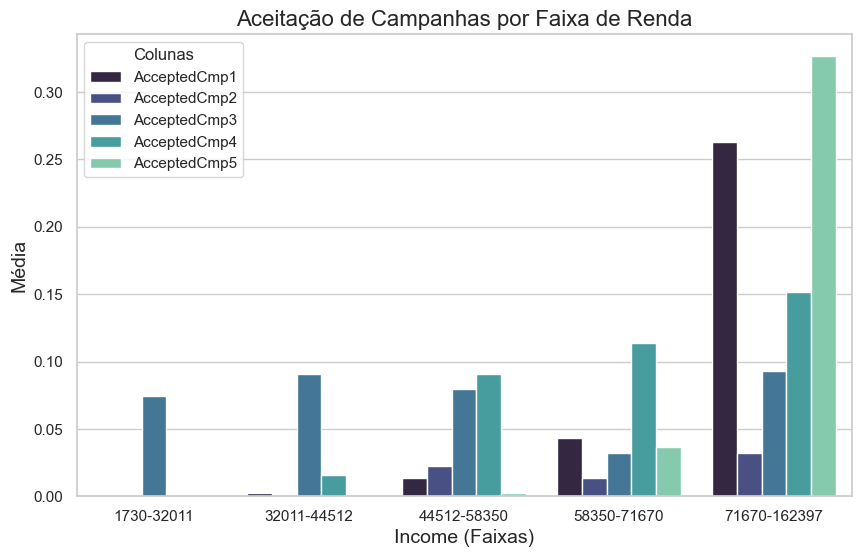

In [25]:
strisce('Aceitação de Campanhas por Faixa de Renda', 'Média', 
        'Income', ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'])

## Local da compra

In [30]:
plot_pie_chart('Análise da venda de produto', 
               ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'])

In [27]:
df.to_csv('data/df_for_k_means.csv', index=False)

<img src="https://media.licdn.com/dms/image/v2/D4D03AQGKyH2VYxJFNw/profile-displayphoto-shrink_200_200/B4DZR3AMiKHkAc-/0/1737163329100?e=1742428800&v=beta&t=g3jnt105dxEQvOyv2XAy6EJjviKfFrw1yH61s28JqYk" alt="capa" width="100">

#### [Enzo Schitini](www.linkedin.com/in/enzoschitini)
#### Data Scientist & Data Analyst • Senior Bubble Developer • SQL • Ux/Ui Design 
[*@ Scituffy Founder*](https://scituffy.bubbleapps.io/version-test/index/home)